<img src="img/usmlogo.png" style="float:right;height:100px">
<img src="img/dilogo.png" style="float:left;height:100px">
<center>
    <h1> Laboratorio 2 </h1>
    <h2> Profesor: Ricardo Ñanculef </h2>
    <h3> Ayudante: Gabriel Ortega </h3>
    <h4> Cristian Navarrete ; 201573549-2 ; INF-280 </h4>
    <h4> Alumno2 ; Rol ; INF-280 </h4>
</center>
<p>
<center><h4>_02/11/2018_</h4></center>
</p>

## Instrucciones


La modalidad de trabajo será mediante el uso de jupyter notebook. El notebook debe ser desarrollado en parejas o individual pero solamente una de esas modalidades (Pueden cambiar de compañero o modalidad en cada laboratorio). Este laboratorio debe ser entregado a más tardar el día Viernes 2 de Noviembre, no se aceptan entregas enviadas al correo del ayudante.

La **modalidad de entrega será un archivo Apellido1_Apellido2_Lab2.zip/.tar.gz/rar** que contenga un notebook que incluya todas las preguntas con sus respectivas respuestas + un README que indique la forma correcta de ejecutar su notebook. Este notebook presenta ciertas preguntas marcadas con **O:** que indican que para los alumnos de malla nueva es opcional, pero obligatoria para los alumnos de malla vieja. En el caso de haber una pareja con un integrante de malla nueva y uno de malla vieja, se considera malla vieja. El laboratorio puede ser trabajado tanto en lenguaje R como en lenguaje python (para los que usen python 2.X, absténganse a las consecuencias). Lea bien el enunciado.

Su notebook debe incluir un encabezado como el presente en este notebook (Si utilizará las imagenes recuerde adjuntar la carpeta de imagenes o borrarlas del markdown), **para la malla debe colocar INF-280 o ILI-280** según corresponda (no ponga otras cosas o se descontará). 

**Cualquier copia detectada implicará reprobación del laboratorio con nota 0 (lo que implica reprobar el ramo con nota 0) además de la notificación correspondiente al Profesor.** 

## Formato

Como podrá notar, esta vez se dejó una celda de código vacía abajo del enunciado de cada pregunta, la idea es que coloque su código en esa celda y luego agregue otra celda Markdown para colocar su respuesta (Si cree que su respuesta solamente requiere de escribir en Markdown puede eliminar la celda de código y dejar su respuesta en Markdown solamente), esto es para ayudar a que no se les descuente puntaje en la presentación de su notebook, puede agregar más celdas, si le parece pertinente, por pregunta, no hay límite de celdas por pregunta.

### Pero yo uso kernel de R y el enunciado tiene el de Python

Si utiliza el kernel de R puede cambiar el kernel del notebook. En el menú superior (File, Edit, View....) en el submenú de Kernel está la opción para cambiar al kernel de R.

## 1. Errores en un libro 

Estudios recientes han evidenciado que la cantidad de errores en un libro de caracter científico se distribuye acorde a una Poisson con parámetro $\lambda$. Para ello se han recopilado datos de distintos libros pertenecientes a la Editorial Cerrito que serán su objeto de estudio. Trabaje con el dataset "libros.csv" 

>a) Gráficamente, ¿Qué puede decir de las dos variables recopiladas para cada libro (Páginas y Errores)?

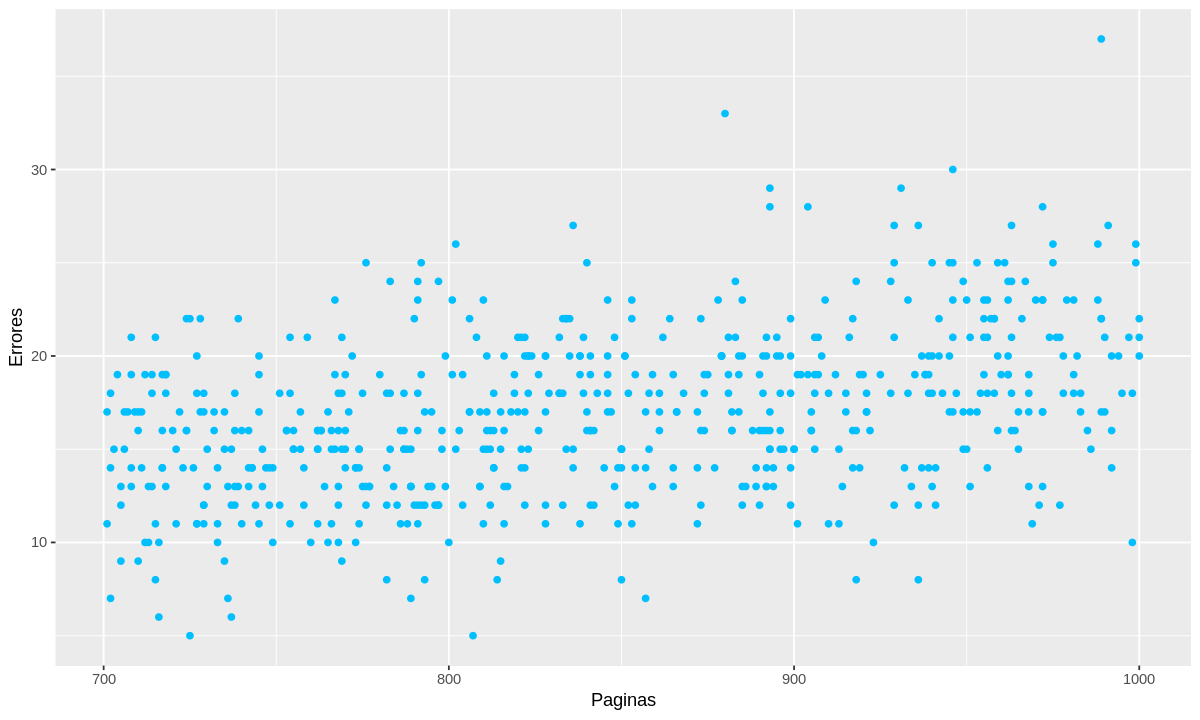

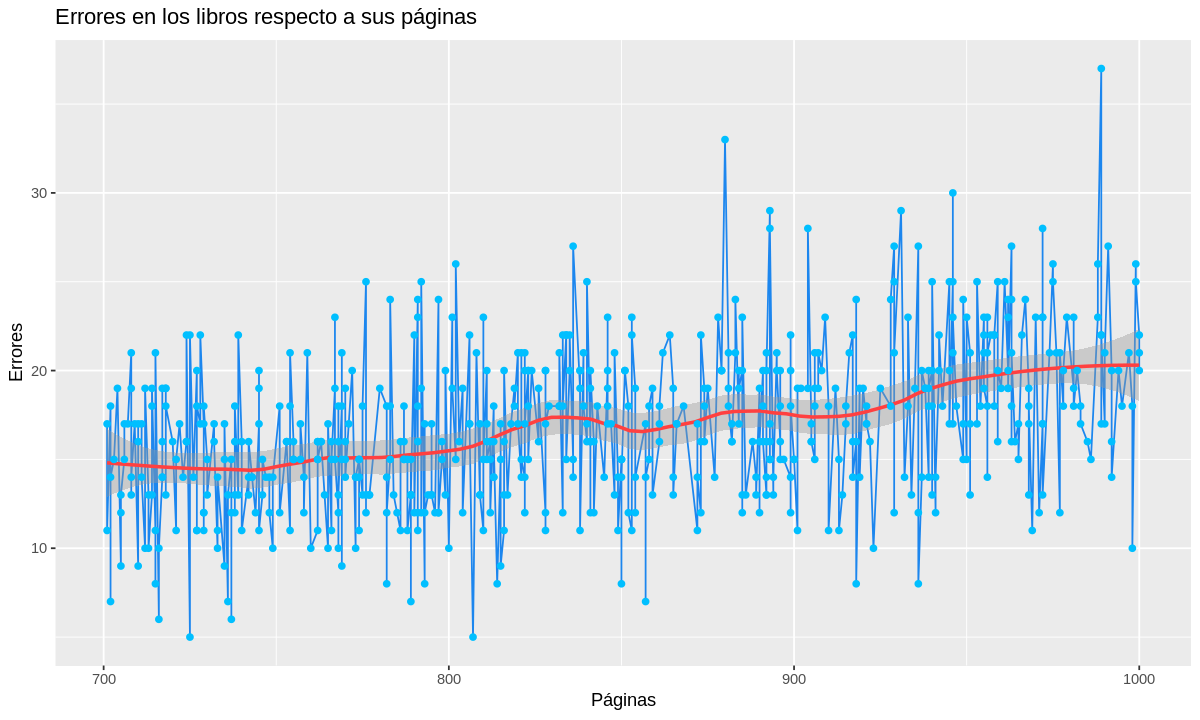

In [18]:
libros = read.csv("libros.csv") 
options(repr.plot.width=10, repr.plot.height=6)

counts <- table(libros$Paginas, libros$Errores)
library(ggplot2)

ggplot(data = libros, aes(x=Paginas, y=Errores)) +geom_point(color="deepskyblue")

ggplot(data=libros, aes(x=Paginas, y=Errores)) +
  geom_line(color="dodgerblue2") +
ggtitle("Errores en los libros respecto a sus páginas")+
geom_smooth(method = "loess", color="brown1", span = 0.3) +
geom_point(color="deepskyblue") +
scale_x_continuous(name="Páginas")



Se ve un leve aumento en la cantidad de errores cuando aumenta la cantidad de páginas.

>b) Determine el parámetro $\lambda$ para que el modelo se ajuste correctamente a la distribución. Sea ordenado con su procedimiento y recuerde explicar los pasos que realiza. Una vez encontrado el parámetro $\lambda$ genere una distribución de poisson con dicho parámetro y compare gráficamente con el dataset.

*Hint en R: rpois()*


*Hint en Python: numpy.random.poisson()*


In [13]:
#https://stats.stackexchange.com/questions/17853/r-code-for-estimating-a-poisson-parameter-and-its-ci
libros = read.csv("libros.csv") 
l_paginas = mean(libros$Paginas)
l_errores = mean(libros$Errores)
#for 
lamb = l_paginas/l_errores
#lamb = 0.083705357 
lamb
n_libros = nrow(libros)
#n_paginas = sum(libros$Paginas)
#poison = rpois(n_paginas,lambda)
#lamb
#plot( rpois(600, lamb), xlim=c(0,600) )
#ggplot(data.frame(x=c(0:600)), aes(rpois(600, lamb))) +geom_point(color="deepskyblue")
#ggplot(data = libros, aes(x=Paginas, y=Errores)) +geom_point(color="deepskyblue")
#poison

#rpois()
# 0.083705357 
# 0.003417257

counts <- c(libros$Paginas)
counts2 <- c(libros$Errores)
#table(libros$Paginas, libros$Errores)
#min(libros$Paginas)

library(MASS)

parms1 = fitdistr(counts, "poisson")
parms2 = fitdistr(counts2, "poisson")
print(parms1)
print(parms2)
plot( rpois(600, 16.86), xlim=c(0,600) )
plot( rpois(600, 844.22), xlim=c(0,600) )


#ggplot(data.frame(x=c(0:10)), aes(x)) +
#    geom_point(aes(y=dpois(x, 1)), colour="red")

#ggplot(data.frame(x=c(0:100)), aes(x)) +    geom_point(aes(y=dpois(x, 0.08)), colour="red")

[1] 50.07276

     lambda  
  844.226667 
 (  1.186189)
     lambda  
  16.8600000 
 ( 0.1676305)


## 2. Diagnóstico de Diabetes 

En esta sección trabajará con un dataset que recopiló diagnósticos médicos de distintas mujeres de al menos 21 años de descendencia India Pima que contenían tests realizados y si poseían diabetes o no, las columnas corresponden a:

* Pregnancies: número de veces que ha estado embarazada
* Glucose: concentración de glucosa después de un test oral de tolerancia a glucosa 
* BloodPressure: presión sanguínea
* SkinThickness: grosor de la capa de piel del tricep
* BMI: índice de masa corporal 
* DiabetesPedigreeFunction: resultado de una función de diabetes
* Age: edad
* Outcome: tiene o no diabetes

Ubicado en "diabetes.csv"

En base a esto usted debe trabajar las siguientes preguntas: 

>a) **O:** Realice un análisis exploratorio y extraiga dos conclusiones. 

>b) Calcule la probabilidad de que una mujer tenga más de 35 años dado que tiene diabetes

In [42]:
diabetes = read.csv("diabetes.csv") 
diabetes_sin_na =  diabetes[-row(diabetes)[diabetes == 0],]

condiabetes = subset(diabetes_sin_na, Outcome=1)

mayor35 = 0

is.integer0 <- function(x)
{
  is.integer(x) && length(x) == 0L
}

getPersona <- function(){
    return(sample(0:nrow(condiabetes),1))
}
n=100000
for(i in 1:n){ #lo haremos n veces
    persona = getPersona()
    if(!is.integer0(condiabetes[persona, "Age"]) && condiabetes[persona, "Age"] > 35 ) {
         mayor35 = mayor35+1
    }
            
}
print("Probabilidad")
print(mayor35/n )

[1] "Probabilidad"
[1] 0.51138


La probabilidad es del 51.2%

>c) Calcule la probabilidad de que una mujer tenga 35 o menos años de edad dado que tiene diabetes

In [43]:
diabetes = read.csv("diabetes.csv") 
diabetes_sin_na =  diabetes[-row(diabetes)[diabetes == 0],]

condiabetes = subset(diabetes_sin_na, Outcome=1)

mayor35 = 0



[1] "Probabilidad"
[1] 0.48189


La probabilidad es del 48.1%

>d) **O:** Compare los resultados obtenidos en b) y c). Comente 

>e) Cree una nueva columna "Rango" en el dataset que represente el rango etáreo al que pertenece la paciente y asigne un valor correspondiente al rango etáreo al que pertenece la paciente:

1. 21-32
2. 33-44
3. 45-56
4. 57-68
5. 69-81

Evidencie este cambio en el dataset.

En base a estos rangos etáreos responder lo siguiente: ¿Es el rango etáreo un buen predictor de la diabetes? Responda utilizando criterios de probabilidad condicional, recuerde explicar su procedimiento.

In [76]:
# Agregar el campo al dataset

diabetes = read.csv("diabetes.csv") 


is.integer0 <- function(x)
{
  is.integer(x) && length(x) == 0L
}

diabetes$Rango = 0

for(i in 1:nrow(diabetes)){ #lo haremos n veces
    if(!is.integer0(diabetes[i, "Age"]) ) {
        if(diabetes[i, "Age"] >= 21) {
             if(diabetes[i, "Age"] <= 32) {
                diabetes$Rango[i] = 1
            }
            else if(diabetes[i, "Age"] <= 44) {
                diabetes$Rango[i] = 2
            }
            else if(diabetes[i, "Age"] <= 56) {
                diabetes$Rango[i] = 3
            }
            else if(diabetes[i, "Age"] <= 68) {
                diabetes$Rango[i] = 4
            }
            else if(diabetes[i, "Age"] <= 81) {
                diabetes$Rango[i] = 5
            }
        }
       
        
    }
            
}

# diabetes
        
cuenta_condiabetes = c(0,0,0,0,0)      
cuenta_n = c(0,0,0,0,0)        
#Calcular las probabilidades de tener cancer segun rango
        


        
    
for(i in 1:nrow(diabetes)){ #lo haremos n veces
    outcome = diabetes[i, "Outcome"]
    rango = diabetes[i, "Rango"]
    if(!is.null(outcome) && !is.integer0(outcome)  && outcome == 1 ) {
         cuenta_condiabetes[rango] = cuenta_condiabetes[rango] + 1
    }
    cuenta_n[rango] = cuenta_n[rango]+1
            
}
print("Probabilidad 21-32")
print(cuenta_condiabetes[0]/cuenta_n[0]) 
        
print("Probabilidad 33-44")
print(cuenta_condiabetes[1]/cuenta_n[1]) 
        
print("Probabilidad 45-56")
print(cuenta_condiabetes[2]/cuenta_n[2]) 
        
print("Probabilidad 57-68")
print(cuenta_condiabetes[3]/cuenta_n[3]) 
        
print("Probabilidad 69-81")
print(cuenta_condiabetes[4]/cuenta_n[4]) 

[1] "Probabilidad 21-32"
numeric(0)
[1] "Probabilidad 33-44"
[1] 0.2450766
[1] "Probabilidad 45-56"
[1] 0.505618
[1] "Probabilidad 57-68"
[1] 0.5930233
[1] "Probabilidad 69-81"
[1] 0.3333333


Para poder responder a esta pregunta, hemos determinado el porcentaje de personas con cancer según el grupo etario.

Del analisis de las probabilides obtenidas, podemos decir que el rango etario si es un buen determinante, ya que las personas entre 57 y 68 años tienen más del doble de probabilidades de tener cancer que las personas entre 33 y 44 años.



## 3. Soldados Enfermos

En el ejército de Sansalandia se propagó un virus cuyos síntomas no son percibidos por el huésped hasta que es demasiado tarde. Gracias a la avanzada tecnología se ha logrado diseñar un test que puede determinar si el individuo está infectado (positivo) o no (negativo) utilizando una muestra de sangre del individuo, pero tiene un costo alto el hecho de realizarlo por individuo $C$. 

El ejército ideó un plan para intentar reducir los costos y consiste en agrupar los $N$ soldados. Se dividen en $M$ grupos de $K$ soldados de forma que $K\cdot M = N$ y se agrupan las $K$ muestras de sangre en una sola para realizar el test. Si uno de cada diez soldados es afectado por el virus responda las siguiente preguntas: 

* $C = 500$
* $N = 3000$
* $K = 60$


>a) Compare el costo promedio utilizando la agrupación $K$ y el costo al aplicar el test a cada soldado uno por uno. Asuma que si un grupo arroja positivo se hace el test uno por uno (de los pertenecientes al grupo).

>b) Determine la probabilidad empírica de que algún grupo arroje un resultado positivo. ¿Qué distribución es comparable con este fenómeno? 

>c) Formalice el resultado anterior y determine el valor esperado de la cantidad de grupos que arrojarán un resultado positivo. Compare con los costos obtenidos en a) y concluya.

## Reglas del Juego y Comentarios 

+ Celda de código que no ejecute anula la respuesta a todas las preguntas contenidas en esa celda a partir de la falla
+ Errores ortográficos, de redacción y oraciones ambiguas descontarán 1 punto c/u, con límite de 50 puntos. 
+ Dudas solamente hasta el día Domingo 28 de Octubre a las 15:00.
+ Dudas **principalmente** vía moodle, evite otro tipo de medio ya que su duda podría ser la de otro.
+ Cada día de atraso descuenta 25 puntos de la nota final con un máximo de dos días de retraso (después es 0).
+ La versión de R que se usará para revisar es 3.4.3
+ La versión de Python que se usará para revisar es 3.6.5
+ Los alumnos malla nueva que decidan responder las preguntas opcionales (obviando algún bonus para todos) tendrán 1 punto bonus por pregunta correctamente respondida, con un máximo de nota 100.
+ Use cualquier librería que estime conveniente, si requiere de instalación explicitarlo en el README (y bien explicitado).
+ Código comentado para facilitar entendimiento.
+ Sea formal y claro con su respuesta, explique su procedimiento y luego responda. 
+ Intente mantener un carácter científico durante la elaboración de su notebook.
+ Defina bien las secciones de su notebook [Tips para usar Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)
